# Supervised Learning - K-Nearest Neighbors Algorithm 

### By Alysha Velasquez <br>

The K-nearest neighbors (KNN) algorithm is a type of supervised machine learning algorithms. The intuition behind the KNN algorithm is simply. First, it calculates the distance of a new data point to all other training data points. Then it selects the K-nearest data points, where K can be any integer. Finally it assigns the data point to the class to which the majority of the K data points belong. The KNN example below uses MAGIC Gamma Telescope dataset. The dataset consists of 10 continuous features for 19,020 observations and a label that is either 'g' for a gamma-ray event or an 'h' for a hadron event.  

#### Import Libraries: <br>

The first step is to import the libraries we will be using.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### Import Dataset: <br>

The second step is to import the dataset. To import the dataset and load it to our dataframe, we use the following code:

In [16]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data"
# Assign colum names to the dataset
names = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'Class']

#Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)

Then we use the head comand to display the first five rows.

In [17]:
dataset.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,Class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


#### Preproccessing: <br>

The third step is to split our dataset into its attributes and labels.

In [18]:
X = dataset.iloc[:, :-1].values #X variable contains the first 10 columns of the dataset (i.e. attributes)
y = dataset.iloc[:, 10].values #y contains the labels

#### Train Test Split: <br>

The fourth step is to create training and test splits. Dividing our dataset into training and test splits helps avoid over-fitting.

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

> The above script splits the dataset into 80% train data an 20% test data. This means that out of total 19,020 records, the training set will contain 15,216 records and the test set contains 3,804 of those records.

#### Feature Scaling: <br>

Prior to making any predictions, it's good practice to scale the features so they can be uniformly evaluated. 

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### Training and Predictions: <br>

Now we can perform training and predictions. The first step is to import the KNeighborsClassifier class from the sklearn.neighbors library. This class is initialized with one parameter, i.e. n_neigbours. 

In [28]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=21)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')

Then we create make predictions on the test data using the following script:

In [29]:
y_pred = classifier.predict(X_test)

#### Evaluating the Algorithm: <br>

Common metrics for evaluating an algorithm include confusion matrix, precision, recall and f1 score. The confusion_matrix and classification_report methods of the sklearn.metrics can be used to compute these metrics. 

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2359   84]
 [ 526  835]]
              precision    recall  f1-score   support

           g       0.82      0.97      0.89      2443
           h       0.91      0.61      0.73      1361

    accuracy                           0.84      3804
   macro avg       0.86      0.79      0.81      3804
weighted avg       0.85      0.84      0.83      3804



> From the results, we can see the weighted average is 85% accuracy.

#### Comparing Error Rate with the K Value: <br>

One way to help you find the best value of K is to plot the graph of K value and the corresponding error rate for the dataset.

In [31]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

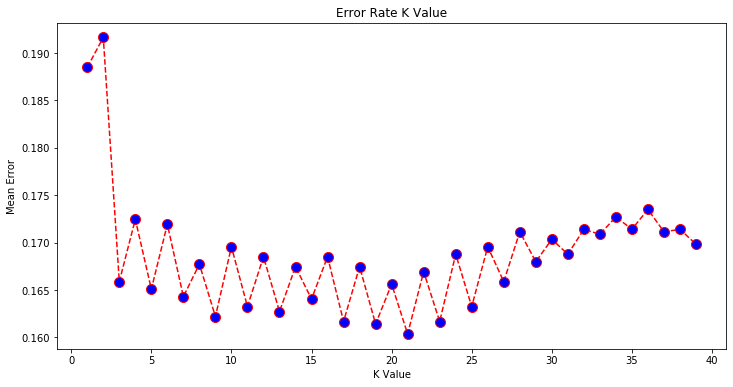

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

> From the output we can see that the mean error is closest to zero when the value of the K is 21.